<a href="https://colab.research.google.com/github/joshua0231234/Calcudora-2/blob/main/IA%20clasificador%20de%20im%C3%A1genes%20con%20Python%20y%20Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import tensorflow_datasets as tfds

# Cargar el dataset fashion_mnist con información adicional
datos, metodos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

print(metodos)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.EBOD5D_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.EBOD5D_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir=PosixGPath('/tmp/tmphobc_1xitfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitIn

In [ ]:
datos_entranamiento , datos_pruebas = datos['train'] , datos ['test']

In [ ]:
nombre_clases = metodos.features['label'].names

In [ ]:
nombre_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
import tensorflow as tf

# Función para normalizar los datos
def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes /= 255.0  # Normalizar de 0-255 a 0-1
    return imagenes, etiquetas

# Normalizar los datos de entrenamiento y prueba usando la función de normalización
datos_entrenamiento = datos['train'].map(normalizar)
datos_pruebas = datos['test'].map(normalizar)

# Agregar los datos a la caché (para mejorar la velocidad de procesamiento)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()




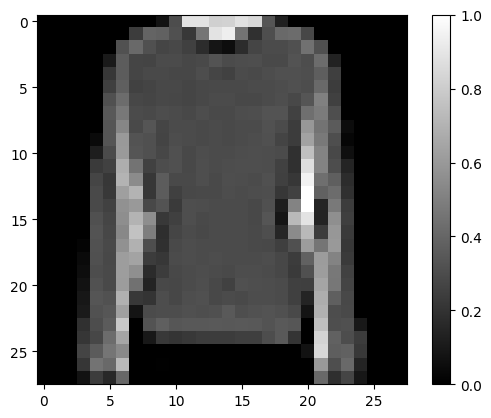

In [ ]:
import matplotlib.pyplot as plt

# Mostrar una imagen de los datos de entrenamiento
for imagen, etiqueta in datos_entrenamiento.take(1):  # Obtener una imagen del dataset
    imagen = imagen.numpy().reshape((28, 28))  # Asegurarse de que la imagen tenga el formato correcto (opcional)

    # Dibujar la imagen
    plt.figure()
    plt.imshow(imagen, cmap='gray')  # Usar 'gray' para imágenes en escala de grises
    plt.colorbar()  # Añadir barra de colores
    plt.grid(False)  # Quitar la cuadrícula
    plt.show()


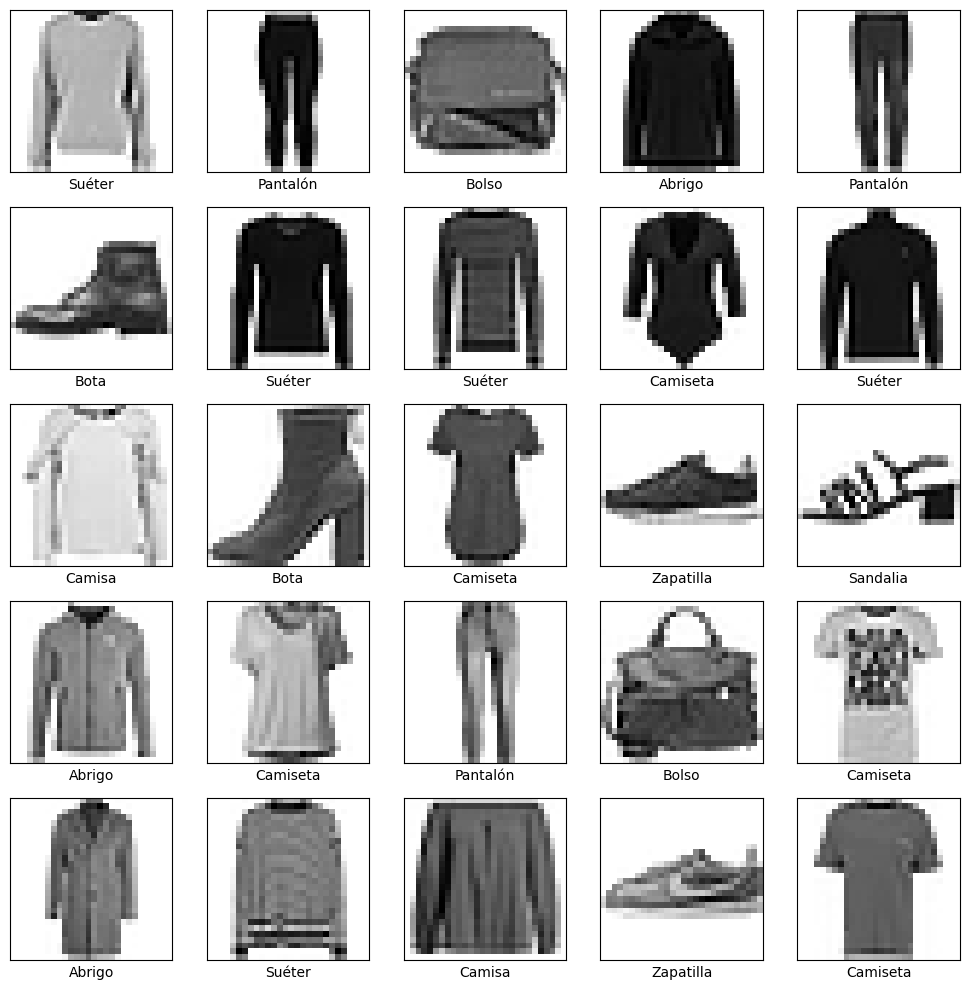

In [ ]:
import matplotlib.pyplot as plt

# Definir nombres de clases
nombre_clases = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
                 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota']

# Crear una figura para mostrar las imágenes
plt.figure(figsize=(10, 10))

# Mostrar 25 imágenes de los datos de entrenamiento
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
    imagen = imagen.numpy().reshape((28, 28))  # Asegurarse de que las imágenes tengan el formato correcto

    plt.subplot(5, 5, i + 1)  # Crear una cuadrícula 5x5
    plt.xticks([])  # Eliminar marcas en el eje X
    plt.yticks([])  # Eliminar marcas en el eje Y
    plt.grid(False)  # Desactivar la cuadrícula
    plt.imshow(imagen, cmap=plt.cm.binary)  # Mostrar la imagen en escala de grises (binaria)
    plt.xlabel(nombre_clases[etiqueta.numpy()])  # Mostrar el nombre de la clase según la etiqueta

# Mostrar todas las imágenes en una sola figura
plt.tight_layout()  # Ajustar la distribución de los subplots
plt.show()



In [ ]:

import tensorflow_datasets as tfds
import numpy as npimport
import matplotlib.pyplot as plt

# Cargar el conjunto de datos fashion_mnist
datos, metodos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

# Obtener los datos de entrenamiento y pruebas
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

# Normalizar los datos (de 0-255 a 0-1)
def normalizar(imagen, etiqueta):
    imagen = tf.cast(imagen, tf.float32)
    imagen /= 255.0
    return imagen, etiqueta

datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

# Hacer caché para mejorar el rendimiento
datos_entrenamiento = datos_entrenamiento.cache().shuffle(60000).batch(32)
datos_pruebas = datos_pruebas.cache().batch(32)

# Definir los nombres de las clases
nombre_clases = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
                 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota']

# Crear el modelo secuencial
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Convierte cada imagen 28x28 en un vector de 784 valores
    tf.keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas y función de activación ReLU
    tf.keras.layers.Dense(64, activation='relu'),   # Capa oculta con 64 neuronas y función de activación ReLU
    tf.keras.layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por clase) y softmax
])

# Compilar el modelo
modelo.compile(
    optimizer='adam',  # Optimizador Adam
    loss='sparse_categorical_crossentropy',  # Pérdida para clasificación multiclase
    metrics=['accuracy']  # Métrica de precisión
)

# Entrenar el modelo
historial = modelo.fit(datos_entrenamiento, epochs=10)

# Evaluar el modelo con los datos de prueba
test_loss, test_accuracy = modelo.evaluate(datos_pruebas)
print(f'\nPrecisión en los datos de prueba: {test_accuracy:.4f}')

# Mostrar un ejemplo de predicción
for imagen, etiqueta in datos_pruebas.take(1):
    predicciones = modelo.predict(imagen)
    print(f'Predicción: {np.argmax(predicciones[0])}, Clase real: {etiqueta.numpy()[0]}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7769 - loss: 0.6335
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8656 - loss: 0.3709
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8787 - loss: 0.3301
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8876 - loss: 0.3058
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8897 - loss: 0.2952
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8959 - loss: 0.2800
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9033 - loss: 0.2604
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9057 - loss: 0.2494
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9095 - loss: 0.2410
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9091 - loss: 0.2376
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8812 - loss: 0.3474

Precisión en los datos de prueba: 0.8765
1/1 ━━

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9129 - loss: 0.2290
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9165 - loss: 0.2179
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9199 - loss: 0.2087
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9223 - loss: 0.2107
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9263 - loss: 0.1961
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9258 - loss: 0.1948
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9290 - loss: 0.1870
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9293 - loss: 0.1836
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9334 - loss: 0.1750
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9356 - loss: 0.1717


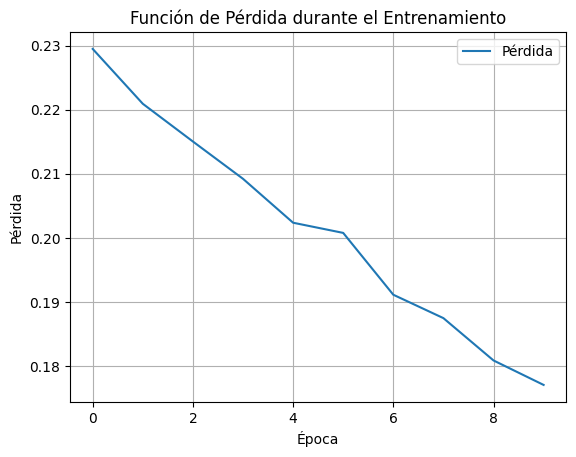

In [ ]:
import matplotlib.pyplot as plt

# Entrenar el modelo y guardar el historial
historial = modelo.fit(datos_entrenamiento, epochs=10)

# Graficar la pérdida por cada época
plt.plot(historial.history['loss'], label='Pérdida')
plt.title('Función de Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Asegúrate de que `nombre_clases` está definida correctamente
# nombre_clases = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', ...]

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
    imagenes_prueba = imagenes_prueba.numpy()
    etiquetas_prueba = etiquetas_prueba.numpy()
    predicciones = modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
    arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[...,0], cmap=plt.cm.binary)

    etiqueta_prediccion = np.argmax(arr_predicciones)
    if etiqueta_prediccion == etiqueta_real:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(nombre_clases[etiqueta_prediccion],
                                  100*np.max(arr_predicciones),
                                  nombre_clases[etiqueta_real]),
                                  color=color)

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
    arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    grafica = plt.bar(range(10), arr_predicciones, color="#777777")
    plt.ylim([0, 1])
    etiqueta_prediccion = np.argmax(arr_predicciones)

    grafica[etiqueta_prediccion].set_color('red')
    grafica[etiqueta_real].set_color('blue')

# Definir filas y columnas para la cuadrícula
filas = 5
columnas = 5
num_imagenes = filas * columnas
plt.figure(figsize=(2*2*columnas, 2*filas))

# Generar la cuadrícula de imágenes y barras de predicción
for i in range(num_imagenes):
    plt.subplot(filas, 2*columnas, 2*i+1)
    graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
    plt.subplot(filas, 2*columnas, 2*i+2)
    graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

plt.tight_layout()
plt.show()



NameError: name 'datos_pruebas' is not defined